In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



I have decided to use regression rather than classification. Regression is better for this case because we are looking to predict a scalar value(price). Classification is better suited to clustering different variables. 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ThomasJRye/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv')
df = df.drop("Date", axis=1)

In [3]:
correlations = df.corr()

In [4]:
correlations

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999763,0.999691,0.999445,0.999445,0.143866
High,0.999763,1.000000,0.999606,0.999771,0.999771,0.149006
Low,0.999691,0.999606,1.000000,0.999684,0.999684,0.138580
Close,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
Adj Close,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
Volume,0.143866,0.149006,0.138580,0.144794,0.144794,1.000000


In [5]:
x = df.values
scaler = preprocessing.MinMaxScaler().fit(x)
x = scaler.transform(x)
df = pd.DataFrame(x)

In [13]:
X = pd.DataFrame(df[0]) #Var1
y = pd.DataFrame(df[5]) #Result

#Now, split the set in training and testing set
#test_size = 0.33 tell the function that 1/3 of values should be put in test arrat
#Random state is a variable that seeds the random generator. In that way
#you'll get the same training and testing set each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

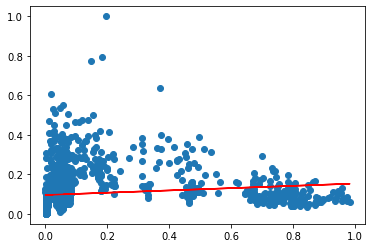

MSE = 0.008635909328644898


In [17]:
plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()                                #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE